In [1]:
import pandas as pd
df = pd.read_csv('./data/processed_headlines_locations.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 8 columns):
Unnamed: 0       605 non-null int64
headline         605 non-null object
city             605 non-null object
accented_city    605 non-null object
latitude         605 non-null float64
longitude        605 non-null float64
countrycode      605 non-null object
pop              605 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 37.9+ KB


In [3]:
df.describe()

,Unnamed: 0,latitude,longitude,pop
count,605.000000,605.000000,605.000000,6.050000e+02
mean,320.560331,26.765746,-38.243197,8.904713e+05
std,186.482236,20.619771,79.480854,1.974091e+06
min,0.000000,-53.787690,-156.506040,1.338100e+04
25%,160.000000,16.419040,-90.444300,5.878700e+04
50%,319.000000,33.749000,-76.496610,1.712140e+05
75%,480.000000,40.714270,7.095490,6.480340e+05
max,646.000000,59.938630,179.364510,1.307630e+07


In [4]:
df['countrycode'].value_counts().sort_values().tail(10)

CN      8
CO      9
AU      9
MX     11
IN     13
CA     15
PH     19
GB     19
BR     21
US    305
Name: countrycode, dtype: int64

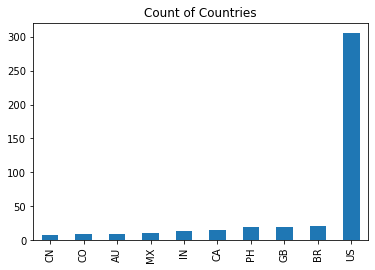

In [5]:
%matplotlib inline

_ = df['countrycode'].value_counts().sort_values().tail(10).plot.bar(title='Count of Countries')

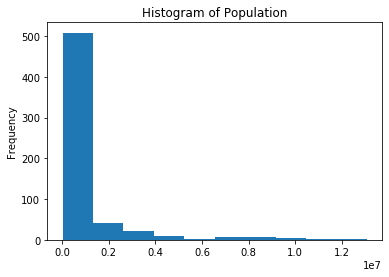

In [6]:
_ = df['pop'].plot.hist(title='Histogram of Population')

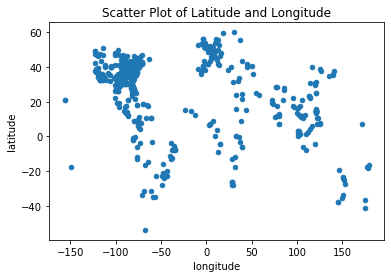

In [7]:
_ = df.plot.scatter(
    x="longitude", y="latitude", title="Scatter Plot of Latitude and Longitude"
)

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## K-Means Clustering
We apply k-means clustering to the **latitude** and **longitude**. First we have to find out the ideal number of clusters using the **elbow** plot method.

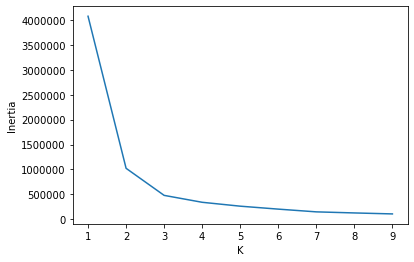

In [9]:
data = df[['longitude','latitude']]
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(data).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Then we display the clusters:

[[ 10.16644904  29.15201165]
 [-89.39338253  30.21716319]
 [115.832742     9.52647926]]


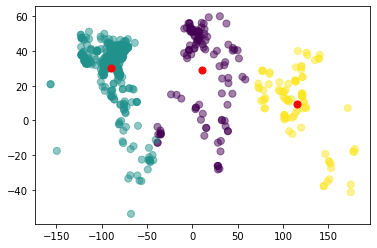

In [10]:
# We take 3 as number of clusters
kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

# Display the data
plt.scatter(data['longitude'], data['latitude'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
# Display the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [11]:
# Save the labels
df.loc[:,'labels'] = kmeans.labels_

In [14]:
df.head(10)

,Unnamed: 0,headline,city,accented_city,latitude,longitude,countrycode,pop,labels
0,0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0,1
1,1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0,1
2,2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0,1
3,3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0,0
4,4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,1300092.0,1
5,5,Trinidad confirms first Zika case,Trinidad,Trinidad,-14.83333,-64.90000,BO,84259.0,1
6,6,Zika Concerns are Spreading in Houston,Houston,Houston,29.76328,-95.36327,US,2296224.0,1
7,7,Geneve Scientists Battle to Find Cure,Geneve,Genève,46.20222,6.14569,CH,183981.0,0
8,8,The CDC in Atlanta is Growing Worried,Atlanta,Atlanta,33.74900,-84.38798,US,463878.0,1
9,9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,São Paulo,-23.54750,-46.63611,BR,10021295.0,1


### DBSCAN Clustering

In [74]:
from sklearn.cluster import DBSCAN
import numpy as np

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
coords = data[['longitude','latitude']]
print(coords.head(2))
db = DBSCAN(eps=epsilon, min_samples=2, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

   longitude  latitude
0  -80.19366  25.77427
1  -74.00597  40.71427
Number of clusters: 32


Draw the clusters:

In [79]:
len(clusters)

32